<a href="https://colab.research.google.com/github/George090872/Computer-Vision/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 6: k-Mean Clustering, Image Segmentation

<b> Objective: </B> During this lab, the goal is to understand the K-mean clustering and its use in  Image Segmentation.

<b> Acknowledgment: </B>
<BR />  
1- https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv <BR/>
<BR />2- https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python <BR />







Show the results of color quantization on `building.jpg` for following values for K:  K = 2, 4, and 8.

Image dimensions: (500, 700, 3)
Reshaped image dimensions: (350000, 3)


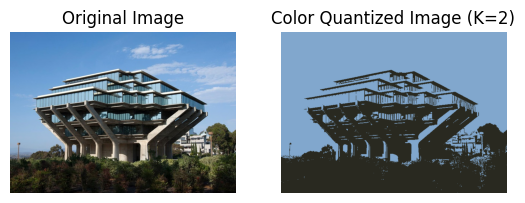

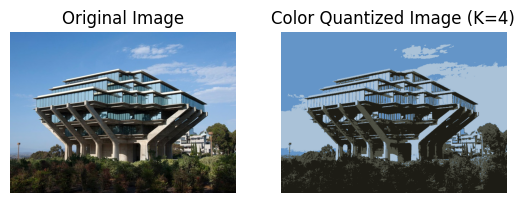

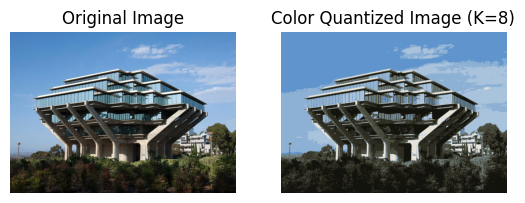

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image and print its dimensions
img = cv2.imread('building.jpg')
print("Image dimensions:", img.shape)

# Reshape the image to a 2D array of pixels, each pixel having 3 color channels (BGR)
Z = img.reshape((-1, 3))
print("Reshaped image dimensions:", Z.shape)

# Convert the pixel values to float32
Z = np.float32(Z)

# Define the criteria for KMeans clustering and the number of clusters (K)
# Criteria consists of type, max iterations, and epsilon (min distance between centers)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Iterate over the desired values of K
for K in [2, 4, 8]:
    # Reshape the image to a 2D array of pixels
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)

    # Apply KMeans clustering on the pixel values with the given criteria, number of clusters and initial centers
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the center values to uint8, assign each pixel to its corresponding cluster center and reshape to the original image dimensions
    center = np.uint8(center)
    res = center[label.ravel()]
    res2 = res.reshape((img.shape))

    # Show the original image using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')


    # Show the resulting image using matplotlib
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
    plt.title('Color Quantized Image (K={})'.format(K))
    plt.axis('off')
    plt.show()

As **K** increases, the image keeps more of the color detail. When **K = 2**, the imageproduced is a two toned image with extreme contrast and loss of minor details. At **K = 4**, more details from the original image is kept. With **K = 8**, the image preserves more minor details and appears more natural while still having a reduced color palette. Lower **K** values result in more abstraction, while higher **K** values balance detail.


Show the results of image segmentation on `nature.jpg` image for following values for K: K = 2, 3, 4, and 5.

(962400, 3)


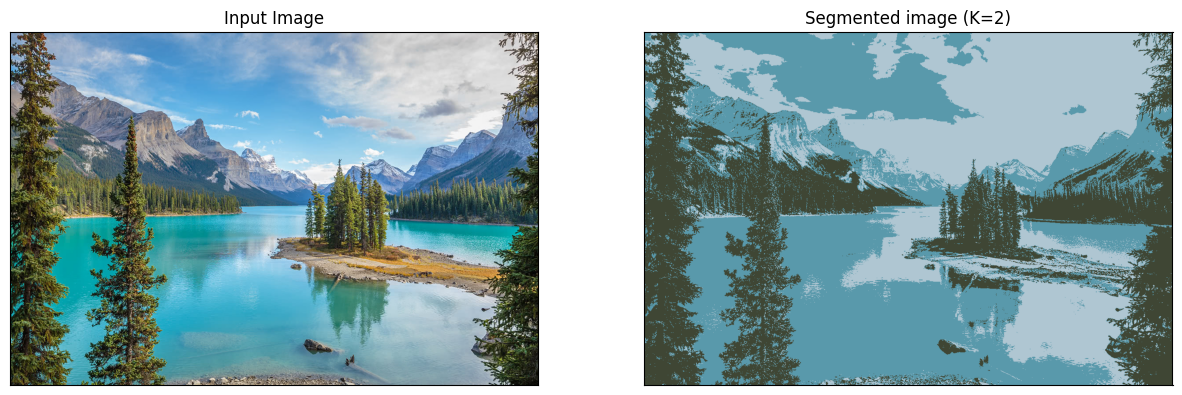

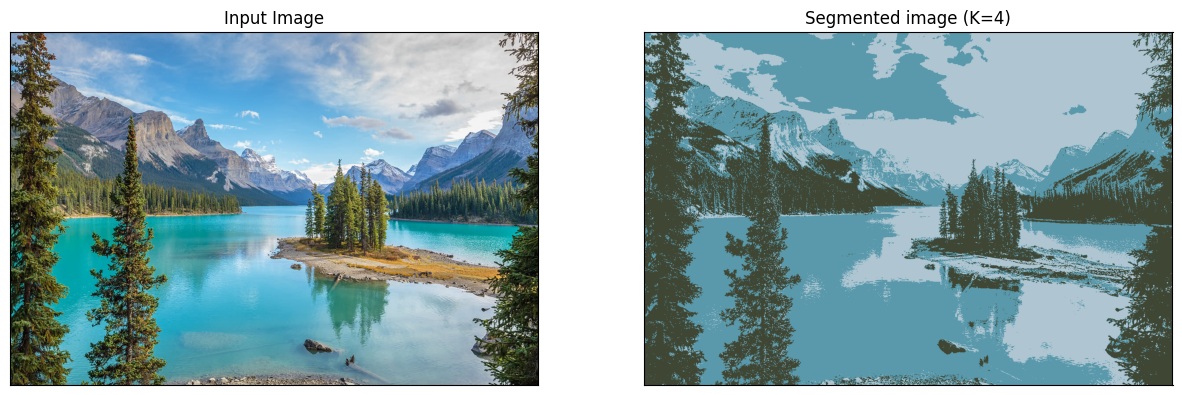

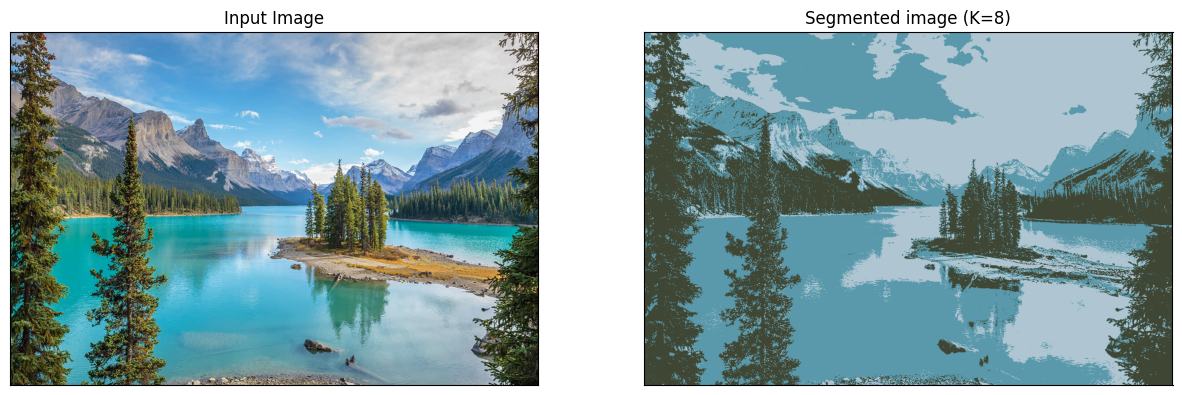

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
image = cv2.imread('nature.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

print(pixel_values.shape)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
for K in [2, 4, 8]:
  k = 3
  _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # convert back to 8 bit values
  centers = np.uint8(centers)

  # flatten the labels array
  labels = labels.flatten()

  # convert all pixels to the color of the centroids
  segmented_image = centers[labels.flatten()]

  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(image.shape)

  # show the image
  plt.figure(figsize=(15, 15))
  plt.subplot(121)
  plt.imshow(image)
  plt.title('Input Image')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(122)
  plt.imshow(segmented_image)
  plt.title('Segmented image (K={})'.format(K))
  plt.xticks([])
  plt.yticks([])
  plt.show()

Similar to Exercise 1, Lower K values result in more abstraction, while higher K values balance detail. But in this case because the original is more colorful it is harder to see the contrast, on the different k values


Read `houses.jpg` as a grayscale image. Now:

a) Use binary thresholding technique to convert the grayscale image to a black-and-white imge (this <a href="https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html">link</a> would be helpful).

b) Use adaptive gaussian thresholding to convert the grayscale image to a black-and-white imge (this <a href="https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html">link</a> would be helpful).

c) Use color quantization technique (with K-means) to convert the grayscale image to a black-and-white imge (use k=2, then one cluster is black pixels and other cluster is white pixels).


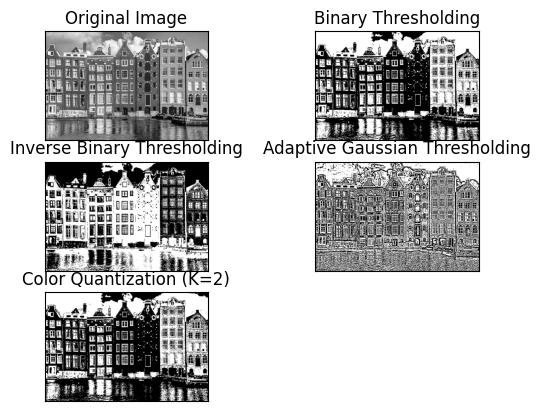

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
img = cv2.imread('houses.jpg', 0)

# a) Binary Thresholding
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#Binary inverse
ret,thresh2 = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)

# b) Adaptive Gaussian Thresholding
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# c) Color Quantization with K-means
# Reshape the image
pixels = img.reshape((-1, 1))
pixels = np.float32(pixels)

# Define criteria, number of clusters (K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
thresh4 = segmented_data.reshape((img.shape))

# Plot the results
titles = ['Original Image', 'Binary Thresholding', 'Inverse Binary Thresholding','Adaptive Gaussian Thresholding', 'Color Quantization (K=2)']
images = [img, thresh1, thresh2, thresh3, thresh4]

for i in range(5):
    plt.subplot(3, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

The three methods differ in how they determine threshold values. **Binary thresholding** applies a global threshold, making it sensitive to lighting variations, The inverse is the **cv.THRESH_BINARY_INV** . **Adaptive Gaussian thresholding** computes thresholds locally, allowing better handling of an image in different lighting. The algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination. **K-means quantization** clusters pixel intensities into two groups, making it more data-driven but potentially introducing noise along object boundaries. While binary and adaptive thresholding are direct thresholding techniques, K-means performs clustering, offering a different approach to binarization.